## Module import, data input and cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
np.random.seed(40) # seting a seed for constant result
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd

'C:\\Users\\akshi\\Downloads\\ADS'

In [3]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 5EA2-B96D

 Directory of C:\Users\akshi\Downloads\ADS

08/02/2023  07:39 PM    <DIR>          .
08/02/2023  07:22 PM    <DIR>          ..
08/02/2023  12:50 AM    <DIR>          .ipynb_checkpoints
07/05/2023  02:08 AM         1,120,695 ADS Assignment 1.ipynb
08/02/2023  02:52 PM             3,258 gender_submission.csv
07/05/2023  07:10 PM         2,974,991 INFO7390_Assignment 1_Akshita_Barot.ipynb
08/02/2023  07:39 PM            85,267 INFO7390_Assignment 2_Akshita_Barot.ipynb
07/05/2023  06:51 PM         3,002,388 K Means basics-1.ipynb
07/04/2023  11:25 PM        23,715,248 Online Retail-1.xlsx
08/02/2023  02:52 PM            28,629 test.csv
08/02/2023  02:52 PM            61,194 train.csv
               8 File(s)     30,991,670 bytes
               3 Dir(s)  78,452,092,928 bytes free


### Read the data

In [4]:
'''Loading the CSV file. Dataset used from Kaggle - https://www.kaggle.com/competitions/titanic/data?select=test.csv '''

df = pd.read_csv("train.csv")

In [5]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


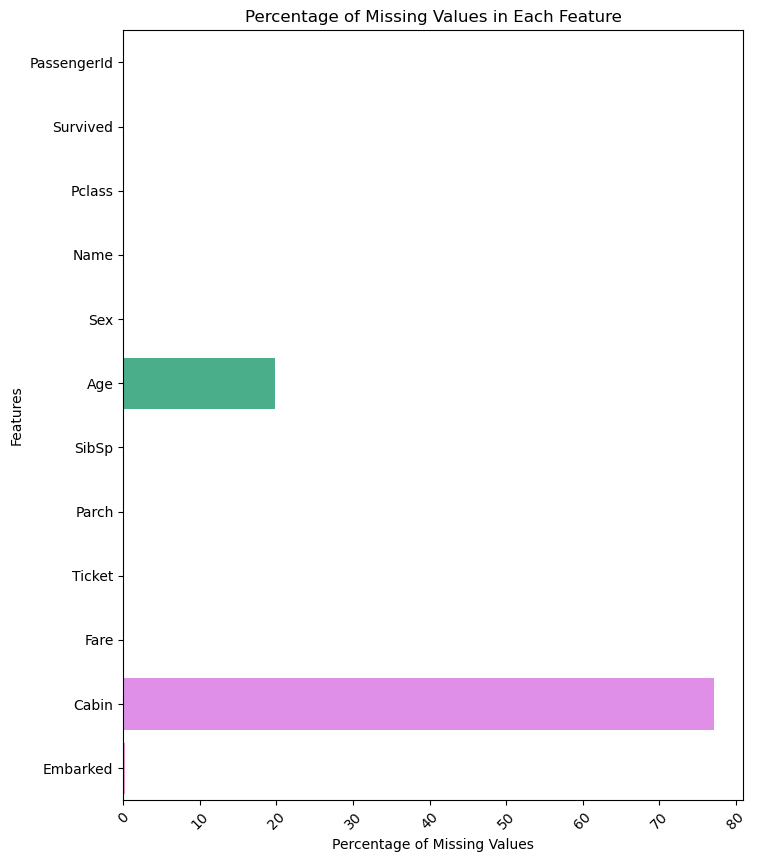

In [7]:
'''Calculating the percentage of null values for each column'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature", "Percent missing"]
plt.figure(figsize =  (8,10))
plt.xticks(rotation = 45)
sns.barplot(x = "Percent missing", y = "Feature", data = null_vals, orient = "h")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Features")
plt.title("Percentage of Missing Values in Each Feature")


plt.show()

In [8]:
'''Dropping rows with null values'''

df1 = df.dropna(subset =["Age", "Cabin"])
df1.shape

(185, 12)

In [9]:
'''Removing all duplicate values from the dataset'''

df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(185, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


#### Feature Engineering

In [10]:
'''Coverting "Sex" to Binary where Male -1 and Female - 0'''

df2['Sex'] = np.where(df2['Sex']== 'male',1,0)
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


In [11]:
'''Dropping the columns that are not required'''

df2.drop(columns =['Name','Ticket','Cabin'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,C
3,4,1,1,0,35.0,1,0,53.1000,S
6,7,0,1,1,54.0,0,0,51.8625,S
10,11,1,3,0,4.0,1,1,16.7000,S
11,12,1,1,0,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,47.0,1,1,52.5542,S
872,873,0,1,1,33.0,0,0,5.0000,S
879,880,1,1,0,56.0,0,1,83.1583,C
887,888,1,1,0,19.0,0,0,30.0000,S


In [12]:
'''Converting the dataframe to array'''

X = np.array(df2.loc[:,list(set(df2.columns) -set(['Embarked']))])
y = np.array(df2.loc[:, 'Embarked'])

In [13]:
'''Label Encoding'''

from numpy import copy as cp
d= {'C':0,'S':1,'Q':2} # Map categorical values to numerical values
Y = cp(y) # Creating a deepcopy of the Embarked column
for k,v in d.items():  # label encode the column by Replacing categorical values with numerical
    Y[y==k] = v 

In [14]:
X = copy.deepcopy(X.T) # Deepcopy the feature matrix X,traget vector Y and transpose it to have the shape
Y = copy.deepcopy(Y.reshape(-1,1).T)

'''Geting the shape'''

shape_X = X.shape
shape_Y = Y.shape

print("The shape of X is: "+str(shape_X))
print("The shape of Y is: "+str(shape_Y))

The shape of X is: (11, 185)
The shape of Y is: (1, 185)


## Implementation of logistic regression unit 

In [15]:
def layer_shapes(X, Y, num_hidden_layers = 1):
    training_size = X.shape[0]   #Size of the input layer
    num_hidden_layers = num_hidden_layers  # Number of hidden layer in the neural network
    output_size = Y.reshape(-1,1).T.shape[0]  # Size of the output layer
    return (training_size,num_hidden_layers,output_size)

# Generate synthetic data with 2 classes and 2 features
N=400
D=2
K=2

X = np.zeros((N * K, D))
Y = np.zeros(N*K,dtype = 'int')
for j in range(K):
    ix = range(N *j, N*(j+1))
    r = np.linspace(0,1,N)
    t = np.linspace(j *4.2, (j+1)*4.2,N) + np.random.randn(N) *0.2 # theta
    X[ix] = np.c_[r *np.sin(t), r* np.cos(t)]
    Y[ix] = (0 if j % 2 == 0 else 1)

X = copy.deepcopy(X.T)
Y = copy.deepcopy(Y.reshape(-1,1).T)

(training_size,num_hidden_layers,output_size) = layer_shapes(X,Y)

print("The size of the input layer is: training_size = "+str(training_size))
print("The size of the hidden layer is: num_hidden_layers = "+str(num_hidden_layers))
print("The size of the output layer is: output_size = "+str(output_size))


The size of the input layer is: training_size = 2
The size of the hidden layer is: num_hidden_layers = 1
The size of the output layer is: output_size = 1


In [16]:
def initialize_parameters(training_size,num_hidden_layers,output_size):
    
    np.random.seed(40)
    # Initialize the weights and biases for the hidden layer
    W1 = np.random.randn(num_hidden_layers,training_size) * 0.01
    b1 = np.zeros((num_hidden_layers,1))
    
    # Initialize the weights and biases for the output layer
    W2 = np.random.randn(output_size,num_hidden_layers) * 0.01
    b2 = np.zeros((output_size,1))
    # Check if the shapes are correct
    assert (W1.shape == (num_hidden_layers,training_size))
    assert (b1.shape == (num_hidden_layers,1))
    assert (W2.shape == (output_size,num_hidden_layers))
    assert (b2.shape == (output_size,1))
    
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    
    return parameters

### Activating Function with ReLU and tan

In [17]:
'''Compute the ReLU function for each element in the input array'''

def relu(x):
    z=[]
    for k in x:
        t=[]
        for i in k:
            t.append(max(0,i))
        z.append(t)
    z=np.array(z)
    z = 1/(1 + np.exp(-z))
    return z

In [18]:
'''Performing forward propagation through the neural networl'''

def forward_propagation(X, parameters):
    # Extract weights and biases from the parameters dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    #Implement the forward propagation
    #Calculate the input to the hidden layer
    Z1 = np.dot(W1,X) +b1
    
    # Appling the activation function to the hidden layer - using tanh activation
    A1 = np.tanh(Z1)
    # Calculate the input to the output layer
    Z2 = np.dot(W2,A1) +b2
    
    # Applying the activation function to the output layer - using ReLU activation
    A2 = relu(Z2)
    
    # Checking the shape of the output(predictions)
    assert(A2.shape == (1,X.shape[1]))
    #Storing values for later use in bp
    cache = {"Z1":Z1,"A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

### Log Loss Function

In [19]:
'''Computes the cost for the predictions A2 and true labesl Y'''
def compute_cost(A2,Y):
    m = Y.shape[1]
    # compute the cross-entropy cost
    #logprobs = Y *log(A2) + (1 -Y) * log(1-A2)
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y), np.log((1-A2)).T)
    cost = -logprobs/m
    
    cost = float(np.squeeze(cost)) #convert cost to float
    assert(isinstance(cost,float)) # check if cost is float
    return cost


In [20]:
'''Performing back propagation to compute gradients of the cost wrt parameters'''
def back_propagation(parameters,cache,X,Y):
    m = X.shape[1]
    #extract weights and biases, values from the parameter dictionary
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    # Backward propagation - calulate the gradients 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,"db1": db1,"dW2":dW2, "db2":db2}
    
    return grads

In [21]:
'''Updating the parameters'''
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    #Update the rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    # storing updated parameters in new dictionary
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    
    return parameters

### Scholastic gradient descent (SGD) implementation

In [22]:
'''Build a model using SCD for optimization'''
def model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(40)
    n_x, n_h, n_y = layer_shapes(X,Y, n_h)
    #initialize the parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    #gradient descent
    for i in range(0,num_iterations):
        #Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        #Cost function
        cost = compute_cost(A2,Y)
        
        #Back Propagation
        grads = back_propagation(parameters, cache, X, Y)
        
        #Gradient descent parameter update
        parameters = update_parameters(parameters, grads, learning_rate =1.2)
        
        #Printing the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i,cost))
    
    return parameters

In [23]:
'''Making prediction using the trained model '''
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters) # Compute probabilities
    threshold = 0.5
    predictions = (A2 > threshold)
    
    return predictions

In [24]:
'''Training the model'''
parameters = model(X,Y, n_h=1, num_iterations=10000,print_cost=True)

Cost after iteration 0: 0.693146
Cost after iteration 1000: 0.523457
Cost after iteration 2000: 0.571849
Cost after iteration 3000: 0.576572
Cost after iteration 4000: 0.573179
Cost after iteration 5000: 0.569069
Cost after iteration 6000: 0.563645
Cost after iteration 7000: 0.552592
Cost after iteration 8000: 0.540972
Cost after iteration 9000: 0.531064


#### Accuracy

In [25]:
'''Printing the Accuracy'''

predictions = predict(parameters,X)
print('The Accuracy of the model is: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

The Accuracy of the model is: 76%


#### F1 Score

In [26]:
'''Calcualting the F1 Score'''

def f1(y_true, y_pred):
    TP = np.sum(np.multiply([i==True for i in y_pred], y_true))
    TN = np.sum(np.multiply([i==False for i in y_pred], [not(j) for j in y_true]))
    FP = np.sum(np.multiply([i==True for i in y_pred], [not(j) for j in y_true]))
    FN = np.sum(np.multiply([i==False for i in y_pred], y_true))
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    if precision != 0 and recall != 0:
        f1 = (2 * precision * recall) / (precision + recall)
    else:
        f1 = 0
    return f1

f1(Y[0],predictions[0])

0.6936790923824959

## Regularization

### L1 (Lasso Regularization)

In [27]:
'''In L1 regularization, we add absolute value of magnitude of coefficient as penalty term to the loss function.'''

def compute_cost(A2, Y):
    
    m = Y.shape[1] # number of example
    
    
    # compute the regularization penalty
    L1_regularization_penalty = np.sum(np.absolute(A2))


    # Compute the cross-entropy cost
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    # compute the total cost
    cost = cost + L1_regularization_penalty
    
    return cost

### L2 (Ridge Regullarization)

In [28]:
'''In L2 regularization, we add squared magnitude of coefficient as penalty term to the loss function.'''
def compute_cost(A2, Y):
    
    m = Y.shape[1] # number of example
    
    
    # compute the regularization penalty
    L2_regularization_penalty = (
        1 / (2 * m)) * np.sum(np.square(A2))


    # Compute the cross-entropy cost
    logprobs = np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log((1-A2)).T)
    cost = -logprobs/m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    # compute the total cost
    cost = cost + L2_regularization_penalty
    
    return cost